# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from collections import Counter
import json
%matplotlib inline
from matplotlib  import pyplot as plt

# Read the Workflow Instance data

In [2]:
filepath = "../data/workflow_latest.tsv"

In [3]:
df = pd.read_csv(filepath,delimiter="\t")
print("Total number of rows : ",df.__len__())

Total number of rows :  181033


In [4]:
df.head(4)

,RecId,LastModDateTime,CreatedDateTime,BlockId,IsExecuting,ExitPort,WorkflowInstanceLink_RecID,WorkflowInstanceLink_Category,EventId,BlockName,BlockTitle,ReadOnly,BlockException,WorkflowDefinition_RecID,DefnName,Status,CompletedDateTime,BlockName1
0,52f4263619204e579562c5eb0dc1c53b,2016-01-07 14:42:32.610,2016-01-07 14:42:32.610,303D0B76B2954A4BB01C144C1220E059,0,ok,00027B5C80C145F4A891641639241067,NaN,82598,start,NaN,NaN,NaN,848f52b2cf824f07bc90d3e1e8b4569e,Incident Closure or Re-Open Requested by Customer,Completed,2016-01-07 14:42:32.500,AAAA
1,8699dbba2ccf4edf854202b8442728a1,2016-01-07 14:42:32.637,2016-01-07 14:42:32.637,B38FE82E50084947B0FC43347EC55ABA,0,false,00027B5C80C145F4A891641639241067,NaN,82598,if,Subject=Close Requested,NaN,NaN,848f52b2cf824f07bc90d3e1e8b4569e,Incident Closure or Re-Open Requested by Customer,Completed,2016-01-07 14:42:32.500,if
2,4138ffea9664428eb203e86fc627876a,2016-01-07 14:42:32.660,2016-01-07 14:42:32.660,3111F4B3BC634A2EB87E9DBF0542CC95,0,false,00027B5C80C145F4A891641639241067,NaN,82598,if,Subject=Not Resolved,NaN,NaN,848f52b2cf824f07bc90d3e1e8b4569e,Incident Closure or Re-Open Requested by Customer,Completed,2016-01-07 14:42:32.500,if
3,c84ae576b3d0472b8bcdaa54154263d4,2016-01-07 14:42:32.660,2016-01-07 14:42:32.660,0DDB75AD30F0451E89A32C3ABA631694,0,completed,00027B5C80C145F4A891641639241067,NaN,82598,stop,NaN,NaN,NaN,848f52b2cf824f07bc90d3e1e8b4569e,Incident Closure or Re-Open Requested by Customer,Completed,2016-01-07 14:42:32.500,zzzz


In [5]:
cols = ["WorkflowDefinition_RecID","WorkflowInstanceLink_RecID","LastModDateTime","BlockException","CreatedDateTime","CompletedDateTime","BlockId","BlockName","ExitPort","IsExecuting"]
final_cols = ["WorkflowDefinition_RecID","WorkflowInstanceLink_RecID","BlockId","BlockName","ExitPort"]
show_cols = ["WorkflowDefinition_RecID","WorkflowInstanceLink_RecID","CreatedDateTime","BlockId","BlockName","ExitPort"]

In [6]:
df[cols].head(5)

,WorkflowDefinition_RecID,WorkflowInstanceLink_RecID,LastModDateTime,BlockException,CreatedDateTime,CompletedDateTime,BlockId,BlockName,ExitPort,IsExecuting
0,848f52b2cf824f07bc90d3e1e8b4569e,00027B5C80C145F4A891641639241067,2016-01-07 14:42:32.610,NaN,2016-01-07 14:42:32.610,2016-01-07 14:42:32.500,303D0B76B2954A4BB01C144C1220E059,start,ok,0
1,848f52b2cf824f07bc90d3e1e8b4569e,00027B5C80C145F4A891641639241067,2016-01-07 14:42:32.637,NaN,2016-01-07 14:42:32.637,2016-01-07 14:42:32.500,B38FE82E50084947B0FC43347EC55ABA,if,false,0
2,848f52b2cf824f07bc90d3e1e8b4569e,00027B5C80C145F4A891641639241067,2016-01-07 14:42:32.660,NaN,2016-01-07 14:42:32.660,2016-01-07 14:42:32.500,3111F4B3BC634A2EB87E9DBF0542CC95,if,false,0
3,848f52b2cf824f07bc90d3e1e8b4569e,00027B5C80C145F4A891641639241067,2016-01-07 14:42:32.660,NaN,2016-01-07 14:42:32.660,2016-01-07 14:42:32.500,0DDB75AD30F0451E89A32C3ABA631694,stop,completed,0
4,bb520765d7c2491aac027fd095d6558d,0005AF6240AE490CB177AD270230FD57,2017-06-19 09:06:20.940,NaN,2017-06-19 09:06:20.940,2017-06-19 09:06:21.083,EB085E0CF3284C6788FD76C484BBC5CD,start,ok,0


In [7]:
def stat(df,cols):
    print("Total number of rows : ",len(df))
    res = list()
    for col in cols:
        null=df[df[col].isnull()].__len__()
        unique=df[col].unique().__len__()
        res.append((col,null,unique))
        if col == "ExitPort":
            print(df[col].unique())
            
            
    metric = pd.DataFrame.from_records(res,columns=["Column","Null Count","Unique Count"])
    return metric


In [8]:
stat(df,cols)

Total number of rows :  181033
['ok' 'false' 'completed' 'started' 'failed' 'sent' 'timedout' 'logged'
 'true' 'default' 'approved' nan 'timed out' 'cancelled' 'assigned'
 'Extension' 'accepted' 'CI unidentified' 'Xtraction' 'ITAM' 'Early Term'
 'denied']


,Column,Null Count,Unique Count
0,WorkflowDefinition_RecID,0,54
1,WorkflowInstanceLink_RecID,0,47604
2,LastModDateTime,0,162987
3,BlockException,180084,950
4,CreatedDateTime,0,163185
5,CompletedDateTime,1293,46855
6,BlockId,0,244
7,BlockName,0,22
8,ExitPort,573,22
9,IsExecuting,0,2


# Data Cleaning

### Retain only those Workflow Instances which are finished executing i.e. $IsExecuting = 0$

In [9]:
executed_wf = pd.DataFrame(df[df.IsExecuting==0])
stat(executed_wf,cols)

Total number of rows :  180494
['ok' 'false' 'completed' 'started' 'failed' 'sent' 'timedout' 'logged'
 'true' 'default' 'approved' nan 'timed out' 'cancelled' 'Extension'
 'CI unidentified' 'Xtraction' 'ITAM' 'Early Term' 'denied']


,Column,Null Count,Unique Count
0,WorkflowDefinition_RecID,0,54
1,WorkflowInstanceLink_RecID,0,47604
2,LastModDateTime,0,162450
3,BlockException,179545,950
4,CreatedDateTime,0,162652
5,CompletedDateTime,1112,46855
6,BlockId,0,243
7,BlockName,0,22
8,ExitPort,302,20
9,IsExecuting,0,1


### Remove the Workflow Instances which do not have $BlockName = "stop"$ and $ExitPort = "completed"$

In [10]:
wf_instance_id = executed_wf[(executed_wf["BlockName"] == "stop") & (executed_wf["ExitPort"] == "completed")]["WorkflowInstanceLink_RecID"].unique()
wf_instance_id.__len__()

47039

In [11]:
completed_wf = executed_wf[executed_wf["WorkflowInstanceLink_RecID"].isin(wf_instance_id)]

In [12]:
completed_wf[cols].head(3)

,WorkflowDefinition_RecID,WorkflowInstanceLink_RecID,LastModDateTime,BlockException,CreatedDateTime,CompletedDateTime,BlockId,BlockName,ExitPort,IsExecuting
0,848f52b2cf824f07bc90d3e1e8b4569e,00027B5C80C145F4A891641639241067,2016-01-07 14:42:32.610,NaN,2016-01-07 14:42:32.610,2016-01-07 14:42:32.500,303D0B76B2954A4BB01C144C1220E059,start,ok,0
1,848f52b2cf824f07bc90d3e1e8b4569e,00027B5C80C145F4A891641639241067,2016-01-07 14:42:32.637,NaN,2016-01-07 14:42:32.637,2016-01-07 14:42:32.500,B38FE82E50084947B0FC43347EC55ABA,if,false,0
2,848f52b2cf824f07bc90d3e1e8b4569e,00027B5C80C145F4A891641639241067,2016-01-07 14:42:32.660,NaN,2016-01-07 14:42:32.660,2016-01-07 14:42:32.500,3111F4B3BC634A2EB87E9DBF0542CC95,if,false,0


In [13]:
stat(completed_wf,cols)

Total number of rows :  177960
['ok' 'false' 'completed' 'started' 'failed' 'sent' 'timedout' 'logged'
 'true' 'default' 'approved' 'timed out' 'cancelled' 'CI unidentified'
 'denied']


,Column,Null Count,Unique Count
0,WorkflowDefinition_RecID,0,48
1,WorkflowInstanceLink_RecID,0,47039
2,LastModDateTime,0,159927
3,BlockException,177315,646
4,CreatedDateTime,0,160131
5,CompletedDateTime,399,46399
6,BlockId,0,192
7,BlockName,0,22
8,ExitPort,0,15
9,IsExecuting,0,1


### Remove the instanes having CompletedDateTime as Null

In [14]:
null_date_wf_instance_id = completed_wf[completed_wf["CompletedDateTime"].isnull()]["WorkflowInstanceLink_RecID"].unique()
null_date_wf_instance_id.__len__()

41

In [15]:
completed_wf = completed_wf[~completed_wf.WorkflowInstanceLink_RecID.isin(null_date_wf_instance_id)]

In [16]:
stat(completed_wf,cols)

Total number of rows :  177561
['ok' 'false' 'completed' 'started' 'failed' 'sent' 'timedout' 'logged'
 'true' 'default' 'approved' 'timed out' 'cancelled' 'CI unidentified'
 'denied']


,Column,Null Count,Unique Count
0,WorkflowDefinition_RecID,0,48
1,WorkflowInstanceLink_RecID,0,46998
2,LastModDateTime,0,159544
3,BlockException,176939,623
4,CreatedDateTime,0,159746
5,CompletedDateTime,0,46398
6,BlockId,0,192
7,BlockName,0,22
8,ExitPort,0,15
9,IsExecuting,0,1


### Remove the instances having BlockException as non Null

In [17]:
#completed_wf["BlockException"].unique()

In [18]:
exception_wf_instance_id = completed_wf[completed_wf["BlockException"].notnull()]["WorkflowInstanceLink_RecID"].unique()


In [19]:
clean_wf = completed_wf[~completed_wf.WorkflowInstanceLink_RecID.isin(exception_wf_instance_id)]

In [20]:
stat(clean_wf,cols)

Total number of rows :  172380
['ok' 'false' 'completed' 'started' 'true' 'sent' 'default' 'approved'
 'timedout' 'cancelled' 'denied']


,Column,Null Count,Unique Count
0,WorkflowDefinition_RecID,0,42
1,WorkflowInstanceLink_RecID,0,46382
2,LastModDateTime,0,154739
3,BlockException,172380,1
4,CreatedDateTime,0,154856
5,CompletedDateTime,0,45785
6,BlockId,0,164
7,BlockName,0,19
8,ExitPort,0,11
9,IsExecuting,0,1


In [21]:
final_wf = pd.DataFrame(clean_wf)
final_wf["Block_Activity"] = final_wf["WorkflowDefinition_RecID"]+";"+final_wf["BlockId"]+";"+final_wf["BlockName"]+";"+final_wf["ExitPort"]

# Data Statistics

In [22]:
print("Total number of Workflow definitions : ",final_wf["WorkflowDefinition_RecID"].unique().__len__(),"\n")
print("Workflow definition IDs : ",final_wf["WorkflowDefinition_RecID"].unique())

Total number of Workflow definitions :  42 

Workflow definition IDs :  ['848f52b2cf824f07bc90d3e1e8b4569e' 'bb520765d7c2491aac027fd095d6558d'
 '5d10293dde7c42d7ab8191f34a32fa4e' 'fcbf1d97f6a149b1810c6ab7b9fa23b6'
 'edc2220adeb54cd598f85951b6c91205' 'f9af09ab1dc2487f8c7471e0c10aeff0'
 '1df2aad8a74e49f68b8686854d7faaad' '321ab07b985e475dac678bb96c95be12'
 '8e166d0de54946198f10b8ae22895d8b' '870835959c8c4808b3cbd04547fc3e50'
 'c3993e69869148d0bd98801e83fbe1f7' '94dc279da2174588a904e3608a4f7cf8'
 'a989e4d069314f3e8c5e5f2523c4d56d' 'a5a322540eeb4a279efc5bdbe165ff2c'
 'caae98a77ee04e3296fc6153393d82b7' 'd6a25eb6e8274235a530a288ec88f286'
 '86874efa1ed9406994842e8bf7204218' '5e5aedcd3f5e4b9eb4de5253409c6377'
 '79f481891cb849fa980b6bfdbe69468c' '94a40d04dd4e4b38a3adbc0ff703f841'
 'bda3f888257d4ec19cbff4c4a4147dc0' 'a9617e355ec943fa85479b4d13583754'
 'ff722cf5b5af44d99ef644eb84de0286' '10b67face3e14fa0b553009493f951b3'
 '3ae302369a8b49a2b8de318baa720a3c' 'de9047625576460186bb063d864561bd'
 '030

In [23]:
wf_def_instance_count_df = final_wf.groupby(["WorkflowDefinition_RecID"]).agg({'WorkflowInstanceLink_RecID': lambda this_is_a_series: len(this_is_a_series.unique())})
wf_def_instance_count_df

,WorkflowInstanceLink_RecID
WorkflowDefinition_RecID,
030f4592f0c144f49b71b8b84f886180,9
10b67face3e14fa0b553009493f951b3,6
1df2aad8a74e49f68b8686854d7faaad,536
321ab07b985e475dac678bb96c95be12,743
3399e68ee72e46e2a6e411fa27a8fb61,1
3ae302369a8b49a2b8de318baa720a3c,36
58636612a47745869d87a68013e3c365,4
5d10293dde7c42d7ab8191f34a32fa4e,536
5e5aedcd3f5e4b9eb4de5253409c6377,63


# 1. Plot the number of workflow instances for every workflow definitions. It should be a bar graph

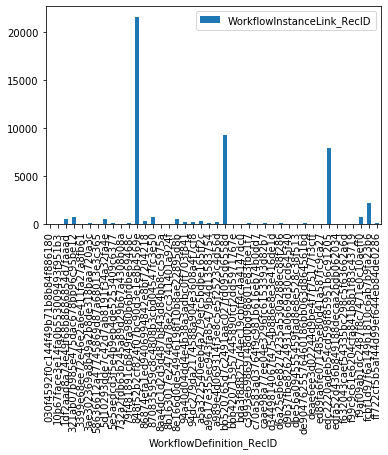

In [24]:
wf_def_instance_count_df.plot.bar()

# Calculate the Mean time to execute each block of respective Workflow

In [25]:
duration_df = pd.DataFrame(final_wf)
duration_df["creation_time"] = duration_df["CreatedDateTime"].map(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f'))
duration_df["closed_time"] = duration_df["CompletedDateTime"].map(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f'))
duration_df["modified_time"] = duration_df["LastModDateTime"].map(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f'))
duration_df['resolve_datetime'] = np.where((duration_df['closed_time'] >= duration_df['modified_time'])
                     , duration_df['closed_time'], duration_df['modified_time'])
duration_df["TimeDelta"] = duration_df['resolve_datetime'] - duration_df["creation_time"]
duration_df["Duration"] = duration_df["TimeDelta"].map(lambda x: x.total_seconds())

In [26]:
duration_df.head(3)

,RecId,LastModDateTime,CreatedDateTime,BlockId,IsExecuting,ExitPort,WorkflowInstanceLink_RecID,WorkflowInstanceLink_Category,EventId,BlockName,...,Status,CompletedDateTime,BlockName1,Block_Activity,creation_time,closed_time,modified_time,resolve_datetime,TimeDelta,Duration
0,52f4263619204e579562c5eb0dc1c53b,2016-01-07 14:42:32.610,2016-01-07 14:42:32.610,303D0B76B2954A4BB01C144C1220E059,0,ok,00027B5C80C145F4A891641639241067,NaN,82598,start,...,Completed,2016-01-07 14:42:32.500,AAAA,848f52b2cf824f07bc90d3e1e8b4569e;303D0B76B2954...,2016-01-07 14:42:32.610,2016-01-07 14:42:32.500,2016-01-07 14:42:32.610,2016-01-07 14:42:32.610,0 days,0.0
1,8699dbba2ccf4edf854202b8442728a1,2016-01-07 14:42:32.637,2016-01-07 14:42:32.637,B38FE82E50084947B0FC43347EC55ABA,0,false,00027B5C80C145F4A891641639241067,NaN,82598,if,...,Completed,2016-01-07 14:42:32.500,if,848f52b2cf824f07bc90d3e1e8b4569e;B38FE82E50084...,2016-01-07 14:42:32.637,2016-01-07 14:42:32.500,2016-01-07 14:42:32.637,2016-01-07 14:42:32.637,0 days,0.0
2,4138ffea9664428eb203e86fc627876a,2016-01-07 14:42:32.660,2016-01-07 14:42:32.660,3111F4B3BC634A2EB87E9DBF0542CC95,0,false,00027B5C80C145F4A891641639241067,NaN,82598,if,...,Completed,2016-01-07 14:42:32.500,if,848f52b2cf824f07bc90d3e1e8b4569e;3111F4B3BC634...,2016-01-07 14:42:32.660,2016-01-07 14:42:32.500,2016-01-07 14:42:32.660,2016-01-07 14:42:32.660,0 days,0.0


# 2. For each Workflow definition, find the mean execution time.


In [27]:
wf_def_inst_df = duration_df.groupby(["WorkflowDefinition_RecID","WorkflowInstanceLink_RecID"]).agg({'Duration': lambda this_is_a_series: np.sum(this_is_a_series)})
time_consumption_df = wf_def_inst_df.groupby(["WorkflowDefinition_RecID"]).agg({'Duration': lambda this_is_a_series: np.mean(this_is_a_series)})
time_consumption_df.head(7)

,Duration
WorkflowDefinition_RecID,
030f4592f0c144f49b71b8b84f886180,1.209605e+06
10b67face3e14fa0b553009493f951b3,2.409261e+06
1df2aad8a74e49f68b8686854d7faaad,1.146399e-01
321ab07b985e475dac678bb96c95be12,6.449044e-01
3399e68ee72e46e2a6e411fa27a8fb61,1.209606e+06
3ae302369a8b49a2b8de318baa720a3c,2.445214e+05
58636612a47745869d87a68013e3c365,2.310700e+01


# 3. For each Workflow definition, and for each BlockId find the mean execution time across the workflow instances.


In [28]:
time_consumption_df = duration_df.groupby(["WorkflowDefinition_RecID","BlockId"]).agg({'Duration': lambda this_is_a_series: np.mean(this_is_a_series)})
time_consumption_df.head(7)

Duration
WorkflowDefinition_RecID         BlockId                                        
030f4592f0c144f49b71b8b84f886180 07239E1B4CAB40529DFB9F5697784809       0.087111
                                 468CE13E14294A4C8C7915A7CF065DDE       0.009778
                                 56DCCECA053F430CAD44C5CD899DDBB0  604802.110111
                                 86E6F312CBBF42AD9C2D9A1BCD12E5C7  604802.382556
                                 F84D87975E1549A594D80CD0102C275B       0.008111
10b67face3e14fa0b553009493f951b3 1B19964A02CC4BE9A0AE8117695BD027  302249.743000
                                 81C9A0F0C1394A359413F04AFFD69EEE  429547.396167

### What is the average execution time of $BlockId = 15EE26D726834493A87BE515670A5AD6$ corresponding to the workflow $Definition RecId = 321ab07b985e475dac678bb96c95be12$

In [29]:
time_consumption_df.loc['321ab07b985e475dac678bb96c95be12','E8F86B40D924457ABFD55F1530B7F3C5']["Duration"]


0.20629744279946163

### Lets see the Execution time distribution for the same

In [30]:
duration_df[(duration_df["WorkflowDefinition_RecID"]=="321ab07b985e475dac678bb96c95be12") & (duration_df["BlockId"]=="E8F86B40D924457ABFD55F1530B7F3C5")].head(10)


,RecId,LastModDateTime,CreatedDateTime,BlockId,IsExecuting,ExitPort,WorkflowInstanceLink_RecID,WorkflowInstanceLink_Category,EventId,BlockName,...,Status,CompletedDateTime,BlockName1,Block_Activity,creation_time,closed_time,modified_time,resolve_datetime,TimeDelta,Duration
171,67d7798470774bcab4e52aa2ef8246b8,2016-10-13 16:00:01.750,2016-10-13 16:00:01.750,E8F86B40D924457ABFD55F1530B7F3C5,0,ok,0031B1F526A34DB698845C329773918C,NaN,279572,runforsearch,...,Completed,2016-10-13 16:00:01.823,runforsearch,321ab07b985e475dac678bb96c95be12;E8F86B40D9244...,2016-10-13 16:00:01.750,2016-10-13 16:00:01.823,2016-10-13 16:00:01.750,2016-10-13 16:00:01.823,00:00:00.073000,0.073
252,dab303a7a93e413e8d5719dfbf37302b,2016-06-17 16:00:02.177,2016-06-17 16:00:02.177,E8F86B40D924457ABFD55F1530B7F3C5,0,ok,005AD64997D642FAA0A699870A6BFD1F,NaN,199723,runforsearch,...,Completed,2016-06-17 16:00:01.977,runforsearch,321ab07b985e475dac678bb96c95be12;E8F86B40D9244...,2016-06-17 16:00:02.177,2016-06-17 16:00:01.977,2016-06-17 16:00:02.177,2016-06-17 16:00:02.177,00:00:00,0.000
303,0468d4ed737d47d6ae2f331f3082fe5d,2015-11-23 16:00:02.690,2015-11-23 16:00:02.690,E8F86B40D924457ABFD55F1530B7F3C5,0,ok,006A1710AD23411399EE291B5F98CAC1,NaN,61362,runforsearch,...,Completed,2015-11-23 16:00:05.637,runforsearch,321ab07b985e475dac678bb96c95be12;E8F86B40D9244...,2015-11-23 16:00:02.690,2015-11-23 16:00:05.637,2015-11-23 16:00:02.690,2015-11-23 16:00:05.637,00:00:02.947000,2.947
1184,fe17604d131d4f04b7d84ae8a62f421c,2016-08-11 16:00:02.043,2016-08-11 16:00:02.043,E8F86B40D924457ABFD55F1530B7F3C5,0,ok,01A7C63395E24AEFBE6E049147C0E328,NaN,234263,runforsearch,...,Completed,2016-08-11 16:00:02.110,runforsearch,321ab07b985e475dac678bb96c95be12;E8F86B40D9244...,2016-08-11 16:00:02.043,2016-08-11 16:00:02.110,2016-08-11 16:00:02.043,2016-08-11 16:00:02.110,00:00:00.067000,0.067
1481,682a5455ed714cbfa277a755dd967aae,2016-08-16 16:00:04.370,2016-08-16 16:00:04.370,E8F86B40D924457ABFD55F1530B7F3C5,0,ok,021BDCB5AE654D249DF8829BD3AA4AF5,NaN,236448,runforsearch,...,Completed,2016-08-16 16:00:04.423,runforsearch,321ab07b985e475dac678bb96c95be12;E8F86B40D9244...,2016-08-16 16:00:04.370,2016-08-16 16:00:04.423,2016-08-16 16:00:04.370,2016-08-16 16:00:04.423,00:00:00.053000,0.053
1537,8c4f8d3b18bc4932a3b2871d42ac2816,2017-01-01 16:00:03.150,2017-01-01 16:00:03.150,E8F86B40D924457ABFD55F1530B7F3C5,0,ok,0231D0047327419F902F00BC3CB40603,NaN,316997,runforsearch,...,Completed,2017-01-01 16:00:03.183,runforsearch,321ab07b985e475dac678bb96c95be12;E8F86B40D9244...,2017-01-01 16:00:03.150,2017-01-01 16:00:03.183,2017-01-01 16:00:03.150,2017-01-01 16:00:03.183,00:00:00.033000,0.033
1544,a70b008b9ef345ab80c6391e115ba384,2016-07-16 16:00:04.243,2016-07-16 16:00:04.243,E8F86B40D924457ABFD55F1530B7F3C5,0,ok,02340B7B75E143FDAC4C9351CCA3C618,NaN,218816,runforsearch,...,Completed,2016-07-16 16:00:04.270,runforsearch,321ab07b985e475dac678bb96c95be12;E8F86B40D9244...,2016-07-16 16:00:04.243,2016-07-16 16:00:04.270,2016-07-16 16:00:04.243,2016-07-16 16:00:04.270,00:00:00.027000,0.027
2163,a5359f6bc7504dbf8009ac029100caff,2016-04-09 16:00:01.480,2016-04-09 16:00:01.480,E8F86B40D924457ABFD55F1530B7F3C5,0,ok,030C550ED28D4BE3AC74538B500A2469,NaN,145392,runforsearch,...,Completed,2016-04-09 16:00:01.490,runforsearch,321ab07b985e475dac678bb96c95be12;E8F86B40D9244...,2016-04-09 16:00:01.480,2016-04-09 16:00:01.490,2016-04-09 16:00:01.480,2016-04-09 16:00:01.490,00:00:00.010000,0.010
2429,1e4c5ada66544720a3b9623b766a2186,2017-02-24 16:00:03.700,2017-02-24 16:00:03.700,E8F86B40D924457ABFD55F1530B7F3C5,0,ok,0372149285EC4D008A058D9D03DC937E,NaN,340825,runforsearch,...,Completed,2017-02-24 16:00:03.617,runforsearch,321ab07b985e475dac678bb96c95be12;E8F86B40D9244...,2017-02-24 16:00:03.700,2017-02-24 16:00:03.617,2017-02-24 16:00:03.700,2017-02-24 16:00:03.700,00:00:00,0.000
2678,a4c3426838104aa2a697e5c5ffe3e8b8,2016-04-19 16:00:02.670,2016-04-19 16:00:02.670,E8F86B40D924457ABFD55F1530B7F3C5,0,ok,03D49CF68184480998E1

# Find Popular Path

In [31]:
def get_unique_path_count(df1):
    df = pd.DataFrame(df1)
    df.reset_index(inplace=True)
    path_list = list(df["Block_Activity"])
    exec_time_df = df.groupby(["Block_Activity"]).agg({'Duration' : lambda x : tuple(x)})
    exec_time_dict = exec_time_df.to_dict()["Duration"]
    path_count_list = Counter(path_list)
    dic = dict()
    for path in path_count_list:
        block_activity_list = list()
        for block_activity in path:
            block_activity_list.append((block_activity.split(";")[1],block_activity.split(";")[3]))
        block_activity_set = frozenset(block_activity_list)
        
        if block_activity_set in dic:
            temp = dic[block_activity_set]
            temp_path = temp[0]
            instance_count = temp[1]
            cum_instance_count = temp[2]+path_count_list.get(path)
            cum_exec_time = temp[3]+exec_time_dict[path]
            
            if instance_count<=path_count_list.get(path):
                instance_count = path_count_list.get(path)
                temp_path = path
                
            k = tuple([temp_path,instance_count,cum_instance_count,cum_exec_time])
            dic[block_activity_set] = k
        else:
            temp_path = path
            cum_instance_count = path_count_list.get(path)
            instance_count = path_count_list.get(path)
            cum_exec_time = exec_time_dict[path]
            k = tuple([temp_path,instance_count,cum_instance_count,cum_exec_time])
            dic[block_activity_set] = k
    unique_path_count = dic.__len__()
    return dic,unique_path_count

### There is only 1 unique path for corresponding workflows (Need evidence for at least 1 alternate path per workflow definition)

In [32]:
path_activity_duration_df = final_wf.groupby(["WorkflowDefinition_RecID","WorkflowInstanceLink_RecID"]).agg({"Block_Activity": lambda x: tuple(x),"Duration": lambda x: np.sum(x)})


In [33]:
wf_def_ids = final_wf["WorkflowDefinition_RecID"].unique()
wf_def_unique_path_count_dict = dict()
unique_path_count_dic = dict()
    
for wf_def_id in wf_def_ids[:]:
#     print("For workflow definition id : ",wf_def_id)
    unique_path_count_dict,unique_path_count = get_unique_path_count(path_activity_duration_df.loc[wf_def_id])
    unique_path_count_dic[wf_def_id]=unique_path_count
    wf_def_unique_path_count_dict[wf_def_id] = unique_path_count_dict


In [34]:
def plot_dict_key_value(dict_obj,ylabel,xlabel,figsize=(20,20)):
    fig, ax = plt.subplots(figsize=figsize, dpi=80) 
    ax.barh(range(len(dict_obj)), list(dict_obj.values()), align='center')
    plt.yticks(range(len(dict_obj)), dict_obj.keys())
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    for i, v in enumerate(dict_obj.values()):
        ax.text(v , i + .25, str(v), color='blue', fontweight='bold')
    plt.show()
    plt.close()

# 4.	Plot the number of unique paths for every workflow definitions.


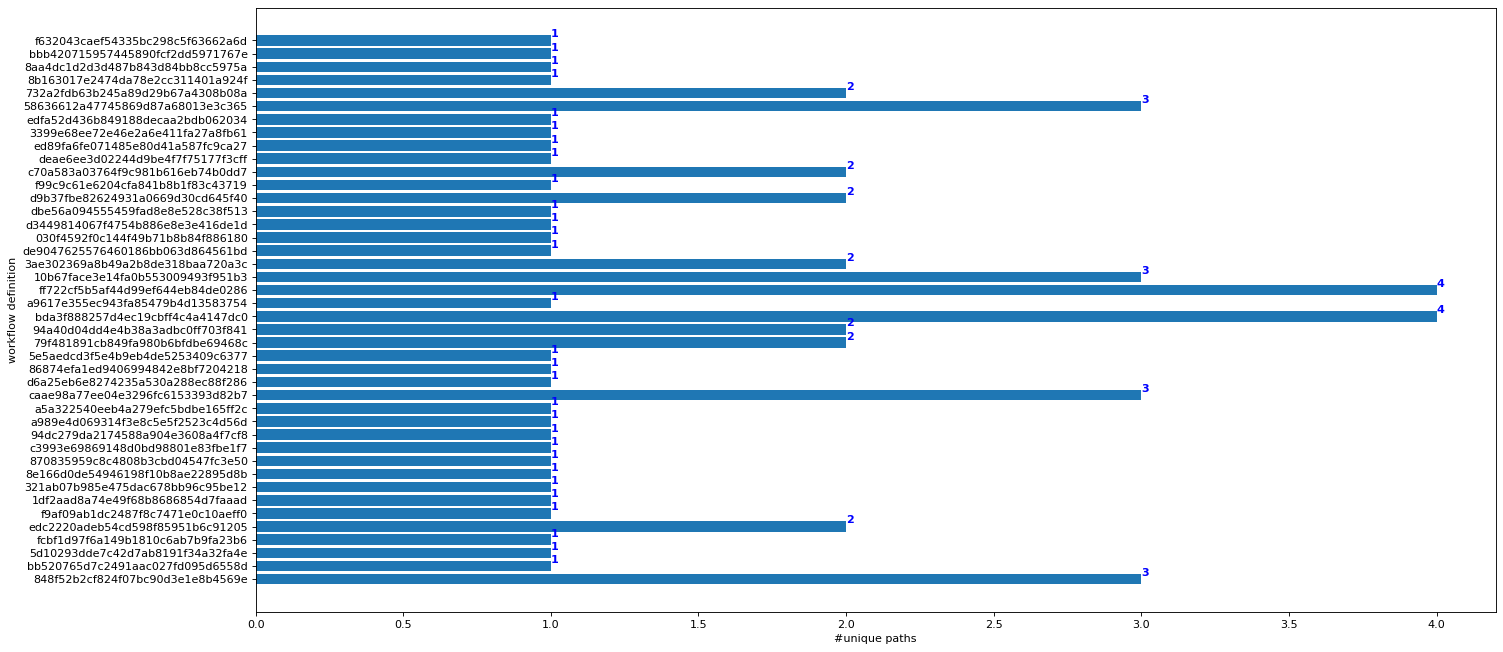

In [35]:
plot_dict_key_value(unique_path_count_dic,"workflow definition","#unique paths",(20,10))

# 5. For each Workflow definition, find the most popular path

In [36]:
def get_popular_path(wf_def_unique_path_count_dict,wf_id,top_k=1):

    dic = wf_def_unique_path_count_dict[wf_id]
    unique_paths = dic.values()
    return_len = len(unique_paths)
    if return_len>top_k:
        return_len = top_k
    result = sorted(unique_paths, key=lambda x: x[1],reverse=True)[:return_len]
    top_k_path = [(r[0],r[2],np.min(r[3]),np.max(r[3]),np.mean(r[3]),np.median(r[3]),r[3]) for r in result]
    return_dict = dict()
    return_dict["workflow_id"] = wf_def_id
    path_list = list()
    for path in top_k_path:
        temp_dict = dict()
        temp_dict["path"] = path[0]
        exec_time_dict = dict()
        for block_activity in path[0]:
            wf_id = block_activity.split(";")[0]
            wf_inst_id = block_activity.split(";")[1]
            exec_time_dict[wf_id+";"+wf_inst_id] = time_consumption_df.loc[wf_id,wf_inst_id]["Duration"]
        temp_dict["block_exec_time"] = exec_time_dict
        temp_dict["workflow_instance_count"] = path[1]
        temp_dict["min_execution_time"] = path[2]
        temp_dict["max_execution_time"] = path[3]
        temp_dict["mean_execution_time"] = path[4]
        temp_dict["median_execution_time"] = path[5]
        path_list.append(temp_dict)
        
        
    return_dict["popular_paths"] = path_list
    return_json = json.dumps(return_dict)
    return return_json

### What is the top 3 popular path for $WorkflowDefinition\_RecID = '848f52b2cf824f07bc90d3e1e8b4569e'$ 

In [37]:
get_popular_path(wf_def_unique_path_count_dict,'848f52b2cf824f07bc90d3e1e8b4569e',1)

'{"workflow_id": "f632043caef54335bc298c5f63662a6d", "popular_paths": [{"path": ["848f52b2cf824f07bc90d3e1e8b4569e;303D0B76B2954A4BB01C144C1220E059;start;ok", "848f52b2cf824f07bc90d3e1e8b4569e;B38FE82E50084947B0FC43347EC55ABA;if;false", "848f52b2cf824f07bc90d3e1e8b4569e;3111F4B3BC634A2EB87E9DBF0542CC95;if;false", "848f52b2cf824f07bc90d3e1e8b4569e;0DDB75AD30F0451E89A32C3ABA631694;stop;completed"], "block_exec_time": {"848f52b2cf824f07bc90d3e1e8b4569e;303D0B76B2954A4BB01C144C1220E059": 0.23611664045879194, "848f52b2cf824f07bc90d3e1e8b4569e;B38FE82E50084947B0FC43347EC55ABA": 0.2072509481084081, "848f52b2cf824f07bc90d3e1e8b4569e;3111F4B3BC634A2EB87E9DBF0542CC95": 0.17661234383740446, "848f52b2cf824f07bc90d3e1e8b4569e;0DDB75AD30F0451E89A32C3ABA631694": 0.17515997595042082}, "workflow_instance_count": 21363, "min_execution_time": 0.0, "max_execution_time": 513.498, "mean_execution_time": 0.7691373870711044, "median_execution_time": 0.064}]}'

### What is the most popular path for $WorkflowDefinition\_RecID = 'f632043caef54335bc298c5f63662a6d'$ 

In [38]:
get_popular_path(wf_def_unique_path_count_dict,'f632043caef54335bc298c5f63662a6d',1)

'{"workflow_id": "f632043caef54335bc298c5f63662a6d", "popular_paths": [{"path": ["f632043caef54335bc298c5f63662a6d;AA18B5417630439189900D3B3D5701F8;start;ok", "f632043caef54335bc298c5f63662a6d;76A23F1256844B7DB4528150DF57EC29;invokeworkflow;completed", "f632043caef54335bc298c5f63662a6d;37C6643DF8974905B4472981D3976D47;task;completed", "f632043caef54335bc298c5f63662a6d;03ABD5C1CAD5471BA5D1F4FBC0BDDA54;update;ok", "f632043caef54335bc298c5f63662a6d;1A05913BC25145C8A34C11B288F041A5;stop;completed"], "block_exec_time": {"f632043caef54335bc298c5f63662a6d;AA18B5417630439189900D3B3D5701F8": 637.2635, "f632043caef54335bc298c5f63662a6d;76A23F1256844B7DB4528150DF57EC29": 4.6745, "f632043caef54335bc298c5f63662a6d;37C6643DF8974905B4472981D3976D47": 636.6220000000001, "f632043caef54335bc298c5f63662a6d;03ABD5C1CAD5471BA5D1F4FBC0BDDA54": 637.13, "f632043caef54335bc298c5f63662a6d;1A05913BC25145C8A34C11B288F041A5": 0.0}, "workflow_instance_count": 2, "min_execution_time": 1534.937, "max_execution_time":